# Lecture 3: Decison Trees


Applied Machine Learning 

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Jan 29, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 1 due before next class  
2. Recitations will continue review __[differential calculus](https://github.com/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb)__ and __[linear algebra](https://github.com/ageron/handson-ml2/blob/master/math_linear_algebra.ipynb)__.   These 2 topics are critical for the next few lectures.
3. Please continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.


# What are Decision Trees?


<table>
    <td width="40%"><center>
        <img src="./img/Lecture-03/decision-tree-creative.png"/>    
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>
<ul>
<font size = "+1.5">
<li> Definition: Supervised learning models that resemble flowcharts. </li>
<li> Use a series of questions to classify data points or predict values.</li>
<li>Example: A decision tree classifying fruits might ask questions about color, size, and texture to decide if it's an apple, orange, or banana.</li>
</font>
</ul>

</td></table> 

# Decision Tree Algorithm

+ Input features $(x_1, x_2, \ldots, x_d) \in X$ may be continuous or categorical
+ Target feature $y \in Y$  (may be continuous, binary categorical, or multiclass categorical)
+ The feature space is recursively partitioned using splitting rules: 
    * Start will the root node consisting of the entire feature spaces
    * Loop over all features in turn:
        - Find the best split for each feature
        - Compare with the overall best split and replace if better
    * The overall best split over all features is chosen as the splitting rule
    * For each of the nodes obtained from the split continue the splitting until no further improvement is possible - this is then a leaf node

+ Use a simple prediction for the leaf node (ex. Average for continuous target, majority class for categorical target)


# Splitting Rules

A splitting rule is one that splits the space $X$ of input features into two disjoint regions. 

Typically these splits are "axis parallel" and the splits only consider rules that involve a single feature.

+ If the feature $x_j$ is continuous then split is  $(x_j \leq t,  x_j > t)$ where $t$ is some threshold value.
+ If the feature $x_j$ is categorical taking values in the set $S =( s_1, s_2, \ldots s_k)$, the split is $(x_j \in \hat{S}, x_j \notin \hat{S})$ where $\hat{S}$ is some proper subset of $S$

# Splitting Criteria for Classification

<center>
<img src="./img/Lecture-03/tree-split.png", width = "250"/>    
</center>



Assume that the node $\cal{R}$ has $N_{\cal{R}}$ examples from $K$ classes denoted $c_1, c_2, \ldots, c_K$.

Define $p_j = {1 \over N_{\cal{R}}} \sum_i^{N_{\cal{R}}} I(y_i = c_j)$ 

Class prediction for Node $\cal{R}$: $c_k$ such that $k = \arg\max_j p_j$.

Let $\cal{I}_{\cal{R}}$ define the impurity at node $\cal{R}$: 

1. Misclassification Error: $\cal{I}_{\cal{R}} = {1 \over N_{\cal{R}}} \sum_i^{N_{\cal{R}}} I(y_i \neq c_k)$ 

2. Gini: $\cal{I}_{\cal{R}} = \sum_{j=1}^K p_j (1-p_j)$

3. Entropy: $\cal{I}_{\cal{R}} = -\sum_{j=1}^K p_j \log{p_j}$


Assume that $\cal{R}$ is split into 2 nodes $\cal{S}$ and $\cal{T}$ with examples $N_{\cal{S}}$ and $N_{\cal{T}}$ respectively

Then the impurity loss from the split of $\cal{R}$ into $\cal{S}$ and $\cal{T}$is is given by 

$ \Delta \cal{I} = \cal{I}_{\cal{R}} - [ {N_{\cal{S}} \over N_{\cal{R}}} \cal{I}_{\cal{S}} + {N_{\cal{T}} \over N_{\cal{R}}} \cal{I}_{\cal{T}} ]$




# Splitting Criteria for Regression

<center>
    <img src="./img/Lecture-03/tree-split.png", width = "250"/>   
</center>

Assume that the node $\cal{R}$ has $N_{\cal{R}}$ examples with targets $y_i, i = 1, \ldots, N_{\cal{R}}$.

Prediction for node $\cal{R}$: $\bar{y}_{\cal{R}} = {1 \over N_{\cal{R}}} \sum_i^{N_{\cal{R}}} y_i$ 

Impurity for Node $\cal{R}$: 

1. Mean Squared Error: $\cal{I}_{\cal{R}} = {1 \over N_{\cal{R}}} \sum_i^{N_{\cal{R}}} (y_i - \bar{y}_{\cal{R}})^2$ 



Assume that $\cal{R}$ is split into 2 nodes $\cal{S}$ and $\cal{T}$ with examples $N_{\cal{R}}$ and $N_{\cal{R}}$ respectively. 


Then the impurity loss from the split of $\cal{R}$ into $\cal{S}$ and $\cal{T}$ is given by 

$ \Delta \cal{I} = \cal{I}_{\cal{R}} - \left[ {N_{\cal{S}} \over N_{\cal{R}}} \cal{I}_{\cal{S}} + {N_T \over N_{\cal{R}}} \cal{I}_{\cal{T}} \right]$ 






# Building a Decision Tree 

+ Splitting Candidates: Select the most informative features for splitting the data effectively.
+ Splitting Criteria: Determine how to best split the data at each node (e.g., using entropy or information gain).
+ Stopping Rules: Decide when to stop splitting the tree and assign a final prediction or category.
+ Impurity Measures:
    - Gini, Entropy for classification
    - MSE for regression



# Pruning a Decision Tree

Grow a large tree $T_0$ and stop the splitting only when the node is either pure (all examples of the same class), or if the number of examples is smaller than some minimum node size.

Let $T \subset T_0$ be any tree that is obtained from T by collapsing the sub-tree at any of the internal nodes of $T_0$.  Let  $\cal{R}_m$ denote the domain of the $m$'th terminal node of $T$, and let $|T|$ be the number of internal nodes of $T$  and let 

\begin{align*}
N_m &= \mathrm{Number} ( x_i \in R_m ), \\
\hat{y}_m &= {1 \over N_m} \sum_{y_i \in R_m} y_i, \\
\cal{I}_m(T) &= {1 \over N_m} \sum_{y_i \in R_m} (y_i - \hat{y}_m).
\end{align*}

Then the cost-complexity of the pruned tree $T$ is given by 

\begin{align*}
C_{\lambda}(T) = \sum_{m=1}^{|T|} N_m \cal{I}_m(T) + \lambda |T|.
\end{align*}

# Pruning a Decision Tree


<table>
        <ul>
        <font size = "+1.5">
        <li> Why is pruning necessary?  The impurity loss can be driven to zero, e.g. if all the leaf nodes just have 1 example. </li>
        <li> Such deep trees have very poor generalization (overfitting on the training data).</li>
        <li>On the other hand, very shallow trees also do a very poor job of prediction (underfitting)</li>
        <li>Hence some penalty is added to the Impurity function to penalize overly-deep trees.</li>
        <li>The value of $\lambda$ balances overfitting vs underfitting and is determined by cross validation.</li>
        </font>
        </ul>
    </td>
</table> 

# Classification Example

Demonstration of multi-class classification using the Iris data set

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:

from sklearn.datasets import load_iris


iris = load_iris(as_frame=True)

print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We restrict the input features to "petal length (cm)" and "petal width (cm)" so that we can plot the 2-D example values and visualize the decision boundaries.  Of course, if you don't need visualizatons then all the input features can be used for modeling and prediction. 

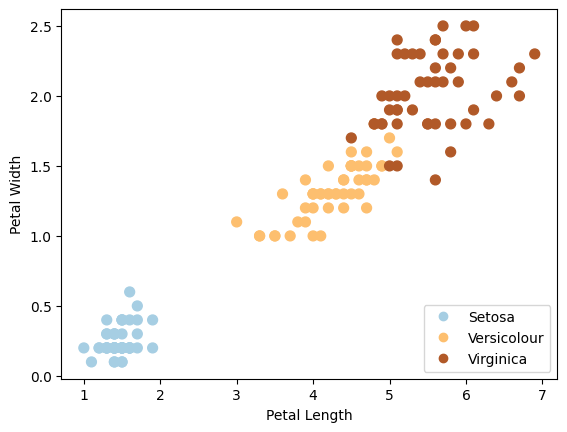

In [4]:
## Plot  the training points

feature_names = ["petal length (cm)", "petal width (cm)"]
X_iris = iris.data[feature_names].values
y_iris = iris.target

p1 = plt.scatter(X_iris[:,0], X_iris[:, 1], c=y_iris, s=50, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica', 'Query'], loc='lower right')
plt.show()


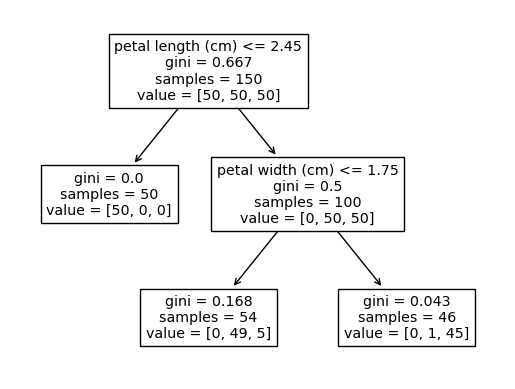

In [5]:
# Decision tree classifier of depth 2 

from sklearn.tree import DecisionTreeClassifier, plot_tree

# build the tree 
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

# visualize the model
plot_tree(tree_clf, feature_names=feature_names, impurity=True)
print('')


In [6]:
# Accessing the Tree Structure

tree = tree_clf.tree_

print(f"node count: {tree.node_count}")
print(f"max depth: {tree.max_depth}")
print(f"max_n_classes: {tree.max_n_classes}")
print(f"n_features: {tree.n_features}")
print(f"n_outputs: {tree.n_outputs}")
print(f"impurity:\n {tree.impurity}")
print(f"value:\n {''.join(map(str, tree.value))}")
print(f"n_node_samples:\n {tree.n_node_samples}")

def depth(tree):
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth
    
print(f"depth:\n {depth(tree)}")


node count: 5
max depth: 2
max_n_classes: 3
n_features: 2
n_outputs: 1
impurity:
 [0.66666667 0.         0.5        0.16803841 0.04253308]
value:
 [[50. 50. 50.]][[50.  0.  0.]][[ 0. 50. 50.]][[ 0. 49.  5.]][[ 0.  1. 45.]]
n_node_samples:
 [150  50 100  54  46]
depth:
 [0. 1. 1. 2. 2.]


# Regression

We use a synthetic dataset with 1 features and a continuous response

In [7]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

def generateData(nsamp):
    X_quad = np.random.rand(n_samp, 1) - 0.5  # a single random input feature
    y_quad = X_quad ** 2 + 0.025 * np.random.randn(n_samp, 1)
    return X_quad, y_quad

    
n_samp = 200
X_quad, y_quad = generateData(n_samp)

n_samp_test = 100
X_quad_test, y_quad_test = generateData(n_samp_test)

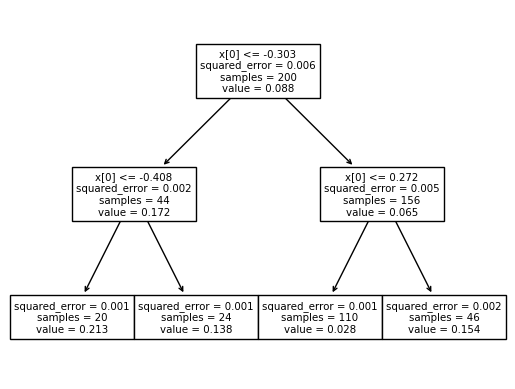

Test set mean squared error: 0.00186


In [8]:
# regression tree of dept 2
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

# visualize the model
plot_tree(tree_reg, impurity=True)
plt.show()

# print the tree accuracy

print('Test set mean squared error: %.5f'
      % mean_squared_error(y_quad_test, tree_reg.predict(X_quad_test)))

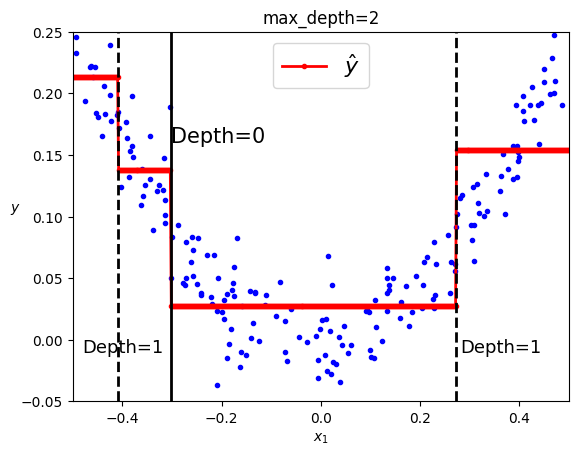

In [9]:
# plot the predictions

axis_range=[-0.5, 0.5, -0.05, 0.25]
x1 = np.linspace(axis_range[0], axis_range[1], 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)
plt.axis(axis_range)
plt.xlabel("$x_1$")
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.show()

# Overfitting and Regularization

We consider 3 trees with min_samples_leaf=1, 15, 30 respectively

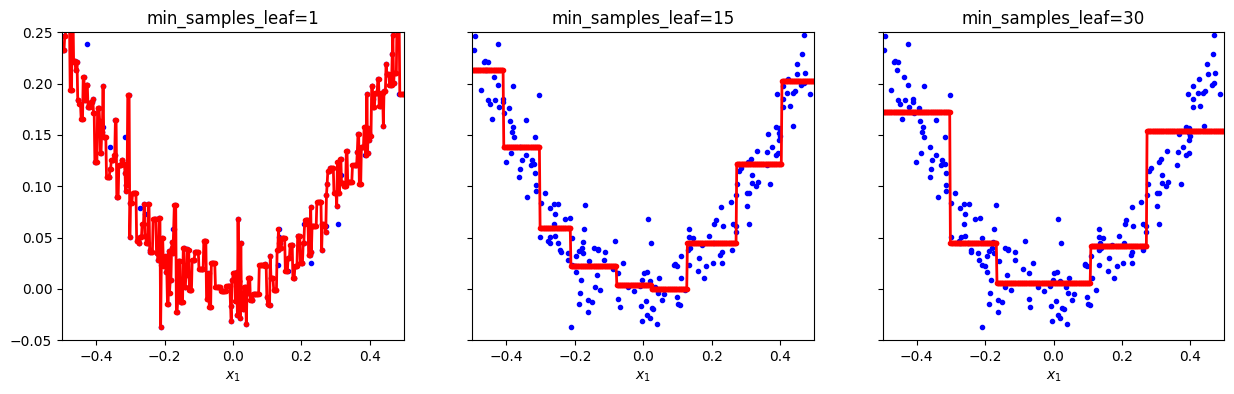

min_samples_leaf = 1 Test set mean squared error: 0.001201340597617939
min_samples_leaf = 15 Test set mean squared error: 0.0010218754854209953
min_samples_leaf = 30 Test set mean squared error: 0.0020664747888276464


In [10]:

min_samples_leaf = [1, 15, 30]
tree_regs = [DecisionTreeRegressor(random_state=42, min_samples_leaf=msl).fit(X_quad, y_quad)  for msl in min_samples_leaf]
x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_preds = [tree_reg.predict(x1) for tree_reg in tree_regs]

fig, axes = plt.subplots(ncols=len(min_samples_leaf), figsize=(15, 4), sharey=True)

for idx, (msl, tree_reg, y_pred) in enumerate(zip(min_samples_leaf, tree_regs, y_preds)):
    plt.sca(axes[idx])
    plt.plot(X_quad, y_quad, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([-0.5, 0.5, -0.05, 0.25])
    plt.xlabel("$x_1$")
    plt.title(f"min_samples_leaf={msl}")
    
    
plt.show()


for msl, tree_reg in zip(min_samples_leaf, tree_regs):
    print(f"min_samples_leaf = {msl}" + " " +
        f"Test set mean squared error: {mean_squared_error(y_quad_test, tree_reg.predict(X_quad_test))}")

# plot the predictions    

# Advantages of Decision Trees


+ Ease of Intepretation due to axis parallel splits
+ Handling of numerical and categorical features is straightforward
+ Invariant to rescaling and normalization of the features
+ Model tree can be transformed into simplified Rulesets which help with model interpretation and augment existing rule-based systems
+ Used in complex decision making process


# Issues with Decison Trees

+ Greedy one-level approach to splitting is often sub-optimal

+ Overfitting: Without pruning, prone to overfitting the training data, leading to poor performance on unseen data.

+ High variance: Splitting rules are sensitive to slight changes in the training data, leading to uunstable predictions

+ Curse of dimensionality: Performance can decline with increasing number of features in the data.

+ Relatively inflexible and poor at modeling highly nonlinear structures (ex. Concentric rings)



#  Summary

Decision trees are powerful and intuitive models for supervised learning, but with some limitations.  They are particularly susceptible to instability (high variance) or overfitting (high bias).  

The basic decision tree is a building block for more sophisticated algorithms that will be studied later in the course such as **boosted trees** and **random forests**.
